# Caso de Estudio

#  Nivel de obesidad

En el siguiente enlace encontrarán una base de datos que permiten estimarlos niveles de obesidad en individuos de los países de México, Perú y Colombia, con base en sus hábitos alimenticios y condición física. Los datos contienen 17 atributos y 2111 registros, además, hay una variable `NObesidad` (Nivel de obesidad), que permite clasificar los datos utilizando los valores de Peso Insuficiente, Peso Normal, Nivel de Sobrepeso I, Nivel de Sobrepeso II, Obesidad Tipo I , Obesidad tipo II y Obesidad tipo III. El 77% de los datos se generaron sintéticamente utilizando la herramienta Weka y el filtro SMOTE, el 23% de los datos se recopilaron directamente de los usuarios a través de una plataforma web, la información acerca de los datos y los paper relevantes que se han creado a partir de este ejercicio lo pueden encontrar en:

[ Estimation of obesity levels based on eating habits and physical condition Data Set ](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+)



Este ejercicio guiado pretende que ustedes hagan una exploración completa a la base, identifiquen grupos en la población y desarrolen modelos que permitan determinar el nivel de obesidad para cualquier individuo.

Después de descargar, cargamos la base:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
DataO=pd.read_csv('../Datos/ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
DataO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Hagan una exploración manual de la base, identifiquen las variables y los tipos de variables a las que nos enfretamos y, con su grupo, plantee unas hipótesis frente a las tareas planteadas. En lo que sigue se sugeriran algunos puntos a desarrollar en este trabajo.

## Exploración de datos

La idea en esta sección es hacer un EDA sobre la base. Es muy importante identificar datos atípicos, nulos y relaciones entre variables (colinealidad, alta correlación, etc.).

## Nivel de obesidad

Es claro que la altura y el peso son determinantes en el Nivel de obesidad, como lo muestra el siguiente gráfico:

<Axes: xlabel='Weight', ylabel='Height'>

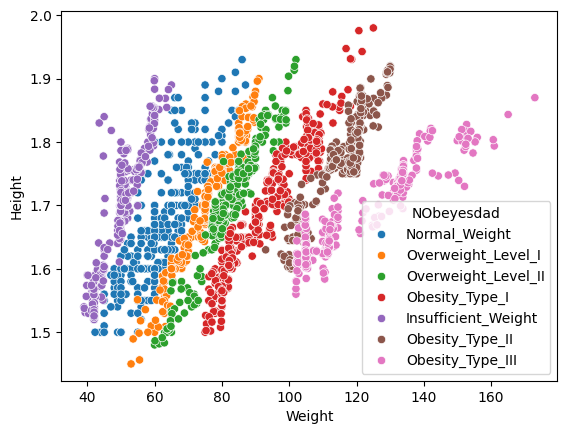

In [4]:
import seaborn as sns
sns.scatterplot(data=DataO,x='Weight',y='Height',hue='NObeyesdad')

Extraiga esas columnas de la base y haga los análisis a continuación sin tener en cuenta esas variables. Responda:

**¿Tiene sentido haber extraido esas variables? ¿Cómo afectará a mi investigación no tenerlas en cuenta?**

In [5]:
DataO.drop(['Height','Weight'],axis=1,inplace=True)

DataO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   object 
 3   FAVC                            2111 non-null   object 
 4   FCVC                            2111 non-null   float64
 5   NCP                             2111 non-null   float64
 6   CAEC                            2111 non-null   object 
 7   SMOKE                           2111 non-null   object 
 8   CH2O                            2111 non-null   float64
 9   SCC                             2111 non-null   object 
 10  FAF                             2111 non-null   float64
 11  TUE                             2111 non-null   float64
 12  CALC                            21

In [6]:
import numpy as np

## Redodndeamos la variable 'FCVC' a 0 decimales
DataO['FCVC']=DataO['FCVC'].apply(lambda x: np.round(x,0)).astype(int)

DataO['FCVC'].value_counts()

FCVC
2    1013
3     996
1     102
Name: count, dtype: int64

In [7]:
## Rendondea la variable 'TUE' a 0 decimales
DataO['TUE']=DataO['TUE'].apply(lambda x: np.round(x,0)).astype(int)

DataO['TUE'].value_counts()

TUE
0    952
1    915
2    244
Name: count, dtype: int64

In [8]:
### Exploremos las variables categoricas

DataO.select_dtypes(include='object').describe()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [9]:
DataO['CAEC']=DataO['CAEC'].map({'no':0,'Sometimes':1,'Frequently':2,'Always':3})
DataO['CALC']=DataO['CALC'].map({'no':0,'Sometimes':1,'Frequently':2,'Always':3})


<Axes: xlabel='CALC', ylabel='count'>

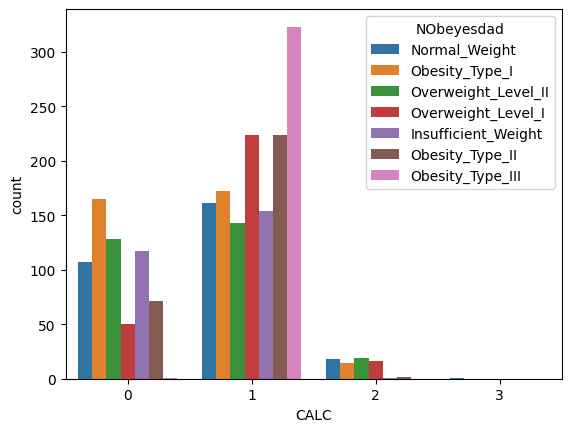

In [10]:
### Estudiamos la relación CALC con NObeyesdad

## Usemos un gráfico de barras

sns.countplot(data=DataO,x='CALC',hue='NObeyesdad')

In [11]:
### Todas las categoricas las volvemos dummies
ColumnsEntrada=DataO.drop('NObeyesdad',axis=1).columns
ColumnsSalida='NObeyesdad'

X=DataO[ColumnsEntrada]
y=DataO[ColumnsSalida]

X=pd.get_dummies(X)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   float64
 1   FCVC                                2111 non-null   int32  
 2   NCP                                 2111 non-null   float64
 3   CAEC                                2111 non-null   int64  
 4   CH2O                                2111 non-null   float64
 5   FAF                                 2111 non-null   float64
 6   TUE                                 2111 non-null   int32  
 7   CALC                                2111 non-null   int64  
 8   Gender_Female                       2111 non-null   bool   
 9   Gender_Male                         2111 non-null   bool   
 10  family_history_with_overweight_no   2111 non-null   bool   
 11  family_history_with_overweight_yes  2111 no

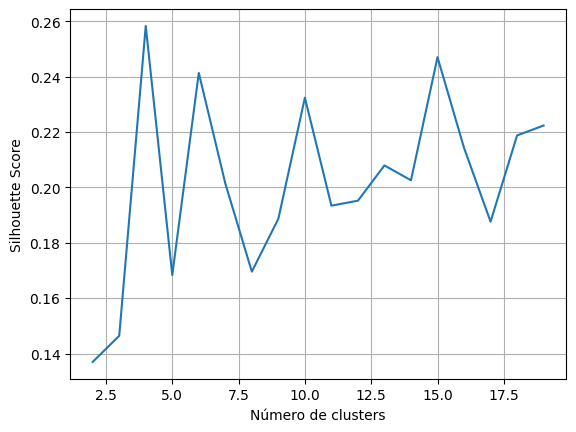

In [30]:
#### Primero hagamos unos cluster

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
## silueta score
from sklearn.metrics import silhouette_score

sc=StandardScaler()

X=sc.fit_transform(X)

list_score=[]

for n_clusters in range(2,20):
    kmeans=KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    clusters=kmeans.predict(X)
    silhouette_avg=silhouette_score(X,clusters)
    list_score.append((n_clusters,silhouette_avg))

plt.plot([x[0] for x in list_score],[x[1] for x in list_score])
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


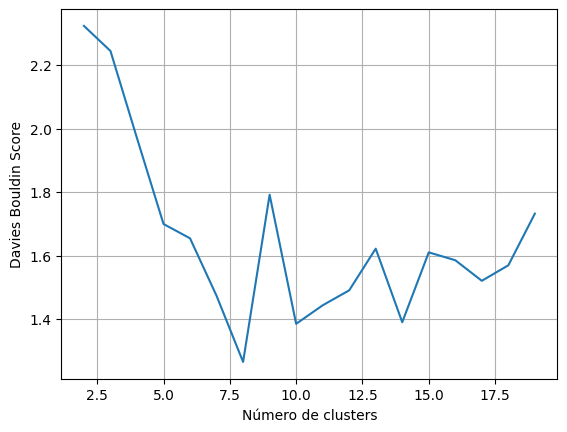

In [32]:
### Ahora usemos indice de Davies Bouldin

from sklearn.metrics import davies_bouldin_score

list_score=[]
for n_clusters in range(2,20):
    kmeans=KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    clusters=kmeans.predict(X)
    db=davies_bouldin_score(X,clusters)
    list_score.append((n_clusters,db))

plt.plot([x[0] for x in list_score],[x[1] for x in list_score])
plt.xlabel('Número de clusters')
plt.ylabel('Davies Bouldin Score')
plt.grid()
plt.show()

Text(0, 0.5, 'Número de muestra')

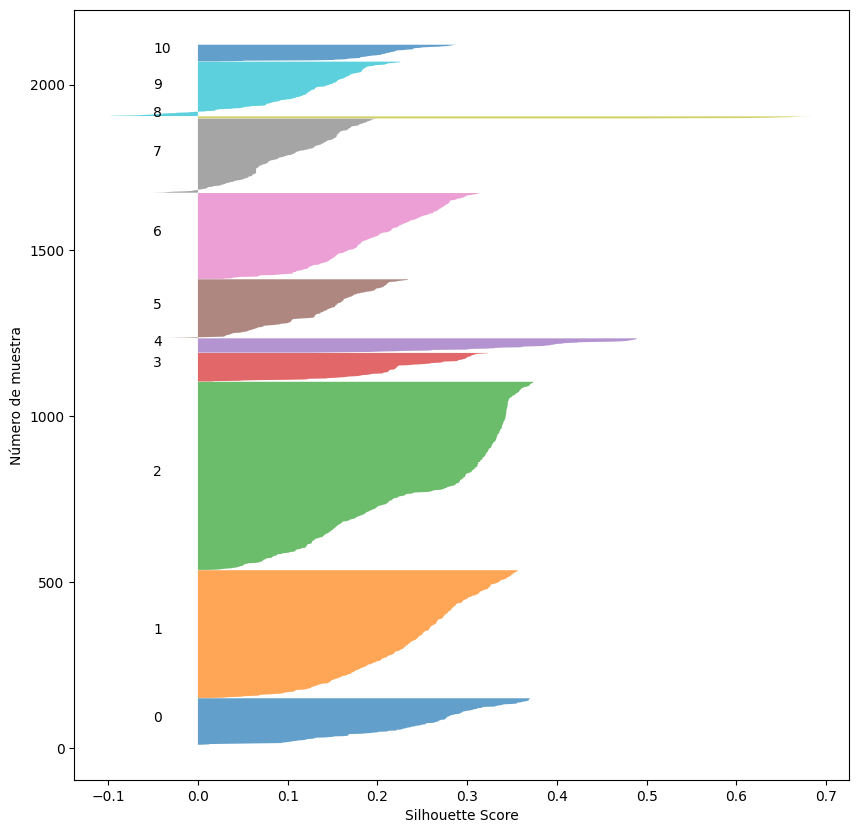

In [28]:
### VAmos a usar 11 cluster y graficacamos siluetas
from sklearn.metrics import silhouette_samples

kmeans=KMeans(n_clusters=11,random_state=0)

kmeans.fit(X)

clusters=kmeans.predict(X)

silhouette_samples_kmeans=silhouette_samples(X,clusters)

plt.figure(figsize=(10,10))
y_lower=10
for i in range(11):
    cluster_i=silhouette_samples_kmeans[clusters==i]
    cluster_i.sort()
    y_upper=y_lower+cluster_i.shape[0]
    plt.fill_betweenx(np.arange(y_lower,y_upper),0,cluster_i,alpha=0.7)
    plt.text(-0.05,y_lower+0.5*cluster_i.shape[0],str(i))
    y_lower=y_upper

plt.xlabel('Silhouette Score')
plt.ylabel('Número de muestra')



<Axes: xlabel='Cluster', ylabel='count'>

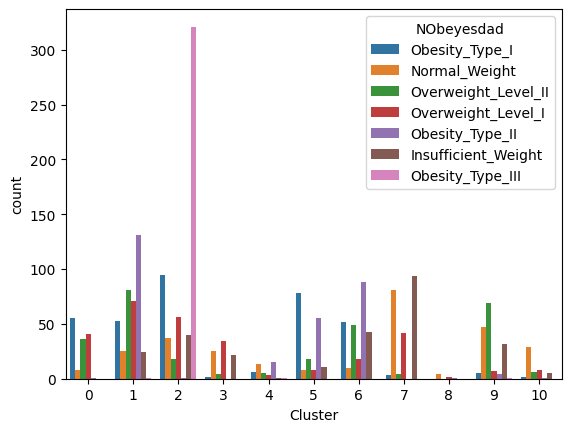

In [29]:
DataO['Cluster']=clusters

### Ahora vamos a estudiar la relación entre el cluster y la variable objetivo

sns.countplot(data=DataO,x='Cluster',hue='NObeyesdad')

In [33]:
### El cluster 2 tiene información importante sobre los hábitos de los de obesidad tipo 3

DataO_OBTIII=DataO[DataO['Cluster']==2]

DataO_OBTIII['NObeyesdad'].value_counts()



NObeyesdad
Obesity_Type_III       321
Obesity_Type_I          95
Overweight_Level_I      56
Insufficient_Weight     40
Normal_Weight           37
Overweight_Level_II     18
Obesity_Type_II          1
Name: count, dtype: int64

In [34]:
## Descripción de los datos

DataO_OBTIII.describe()

,Age,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,Cluster
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.0
mean,22.698391,2.684859,2.750040,1.107394,2.121599,0.798417,0.716549,0.769366,2.0
std,3.156129,0.535495,0.701639,0.376677,0.617693,0.794388,0.604750,0.469130,0.0
min,16.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.0
25%,20.809133,2.000000,3.000000,1.000000,1.652652,0.011398,0.000000,0.000000,2.0
50%,22.451782,3.000000,3.000000,1.000000,2.200426,0.631255,1.000000,1.000000,2.0
75%,25.919324,3.000000,3.000000,1.000000,2.654653,1.444574,1.000000,1.000000,2.0
max,40.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.0


In [35]:
DataO_OBTIII.describe(include='object')

,Gender,family_history_with_overweight,FAVC,SMOKE,SCC,MTRANS,NObeyesdad
count,568,568,568,568,568,568,568
unique,1,1,1,1,1,2,7
top,Female,yes,yes,no,no,Public_Transportation,Obesity_Type_III
freq,568,568,568,568,568,567,321


In [57]:
### DBSCAN

## Dos hipermarametros: eps y min_samples

from sklearn.cluster import DBSCAN

list_score=[]

for eps in np.arange(2,8,0.1):
    for min_samples in range(5,10):
        df_temp=pd.DataFrame()
        dbscan=DBSCAN(eps=eps,min_samples=min_samples)
        clusters=dbscan.fit_predict(X)
        ## Valores_cluster
        df_temp['Cluster']=clusters
        cluster_count=len(np.unique(clusters))
        valor_maximo_cluster=df_temp['Cluster'].value_counts().max()    
        if len(np.unique(clusters))>=1:
            if valor_maximo_cluster<1000:
                silhouette_avg=silhouette_score(X,clusters)
                list_score.append((eps,min_samples,silhouette_avg,cluster_count))

list_score

[(2.0, 5, 0.1009584491815418, 24),
 (2.0, 6, 0.13134781241123397, 20),
 (2.0, 7, 0.12689645352365203, 17),
 (2.0, 8, 0.12203634657568996, 17),
 (2.0, 9, 0.1191370066800077, 14),
 (2.1, 5, 0.06569638452881486, 29),
 (2.1, 6, 0.14659221934449904, 21),
 (2.1, 7, 0.1363256213697457, 17),
 (2.1, 8, 0.13113083493023128, 17),
 (2.1, 9, 0.1289570895620194, 16),
 (2.2, 5, 0.16118000659148615, 20),
 (2.2, 6, 0.16456468543266203, 19),
 (2.2, 7, 0.15545706530294917, 15),
 (2.2, 8, 0.15430100492700652, 16),
 (2.2, 9, 0.1414057322391515, 16),
 (2.3000000000000003, 5, 0.1774457429925187, 19),
 (2.3000000000000003, 6, 0.17261793534681003, 17),
 (2.3000000000000003, 7, 0.17285357161763854, 14),
 (2.3000000000000003, 8, 0.1667533556226115, 13),
 (2.3000000000000003, 9, 0.16046683564772926, 14),
 (2.4000000000000004, 5, 0.18560924315730076, 19),
 (2.4000000000000004, 6, 0.17730321921362965, 18),
 (2.4000000000000004, 7, 0.18189807150266882, 16),
 (2.4000000000000004, 8, 0.17329558821884183, 13),
 (2.4000

In [58]:
### Extraemos los 3 mejores

list_score.sort(key=lambda x: x[2],reverse=True)

list_score[:10]

[(2.8000000000000007, 5, 0.20624387940140151, 20),
 (2.7000000000000006, 5, 0.20338747642150404, 21),
 (2.8000000000000007, 6, 0.20075000998846856, 19),
 (2.6000000000000005, 5, 0.19850114250752582, 20),
 (2.7000000000000006, 6, 0.19756300728644077, 19),
 (2.8000000000000007, 7, 0.19621182499090833, 18),
 (2.7000000000000006, 7, 0.19482595019297658, 17),
 (2.8000000000000007, 8, 0.19419470737738131, 15),
 (2.5000000000000004, 5, 0.19307966157091858, 20),
 (2.7000000000000006, 8, 0.1930633312130185, 15)]

In [59]:
### Dejamos eps=3.6 y min_samples=5

dbscan=DBSCAN(eps=3.6,min_samples=5)

clusters=dbscan.fit_predict(X)

DataO['Cluster_DBSCAN']=clusters

DataO['Cluster_DBSCAN'].value_counts()

Cluster_DBSCAN
 3    1491
 2     237
-1     140
 0     102
 1      56
 6      21
 4      19
 8      15
 7      15
 5      15
Name: count, dtype: int64

## Exploración Previa 

1. Tomen las variables cuantitativas y determinen agrupamientos en la base de datos. No olviden fijar una semilla para la revisión del trabajo. No duden en usar métodos que permitan determinar un valor adecuado de agrupamientos.

2. Es importante generar visualizaciones adecuadas de los datos, donde luego tendrán que poner cada registro en un plano cartesiano. Usen reducciones de dimensionalidad.

3. Concluyan a partir de los resultados.

## Aprendizaje Supervisado

En esta sección crearemos modelos que permitan responder la pregunta inicial:

1. Particionan la base en 2 (Entrenamiento y testeo) (80/20) de nuevo con semilla fija.

2. Usando la base de entrenamiento crearán algunos modelos de clasificación con el fin de predecir el nivel de obesidad. No olviden que deben hacer una selección de variables y una optimización de hiperparámetros.

3. Usando la base de testeo validar cada modelo (Uso matrices de confusión, estadísticos apropiados, curvas ROC, AUC...)

4. De acuerdo con los resultados identifico problemas como sobre ajuste y mal desempeño del modelo.

5. Tunear el modelo con GridSearchCV y RandomizedSearchCV. Para determinar el mejor.

6. Visualizamos el modelo (si es posible). 


## Proyecto Final

Debe entregarse el código y los informes en un repositorio de GitHub que tendra la siguiente estructura:

```bash
|_ ProyectoFinal
    |_ README.md
    |_ requirements.txt
    |_ datos
        |_ base.csv
    |_ notebooks
        |_ exploracion.ipynb
        |_ aprendizaje_supervisado.ipynb
    |_ src (Opcional)
        |_ exploracion.py
        |_ aprendizaje_supervisado.py
```

Los cuadernos deben contener:

1. Una descripción de los datos y las variables.
2. **[Cuaderno Exploración]** Una exploración de los datos, se debe analizar la presencia de datos nulos, la distribución de las variables y la presencia de datos atípicos. Además, se deben presentar visualizaciones adecuadas de los datos
3. **[Cuaderno Exploración]** Una descripción de los agrupamientos encontrados ¿Hay algún cluster que muestre un patrón de habitos alimenticios y condición física que permita identificar el nivel de obesidad?
4. **[Cuaderno Aprendizaje]** Una descripción de los modelos de clasificación. ¿Cuál es el mejor modelo? ¿Cuál es el desempeño del modelo? ¿Qué variables son las más importantes?
5. **[Ambos]** Conclusiones.